## IT5437 - Computer Vision Assignment

#### Dissanayake D.M.K.M. 249298E

#### Implement the intensity transformation 

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_read = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

Preparing transform

51
100
105
256


<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Kasun\AppData\Local\Temp\ipykernel_32152\1060460522.py:17: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')


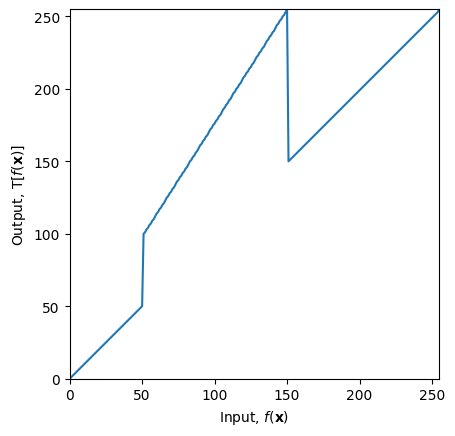

In [ ]:
t1 = np.linspace(0, 50, 51).astype('uint8')
print(len(t1))
t2 = np.linspace(100, 255, 100).astype('uint8')
print(len(t2))
t3 = np.linspace(150, 255, 105).astype('uint8')
print(len(t3))
 
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()

Add image transform

In [9]:
image_transformed = cv.LUT(image_read, transform)

In [11]:
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", image_read)
cv.waitKey(0)

cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

In [13]:
cv.imwrite('a1images/emma_gray.jpg', image_read)

True

In [12]:
cv.imwrite('a1images/emma_transformed.jpg', image_transformed)

True

Accentuate white matter

In [ ]:
image_brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_COLOR)

In [24]:
t1 = np.linspace(0, 200, 224).astype('uint8')          
t2 = np.linspace(250, 255, 32).astype('uint8')      
wm_transform = np.concatenate((t1, t2), axis=0)
# wm_transform = np.pad(wm_transform, (0, 256-len(wm_transform)), 'edge')

wm_img = cv.LUT(image_brain, wm_transform)

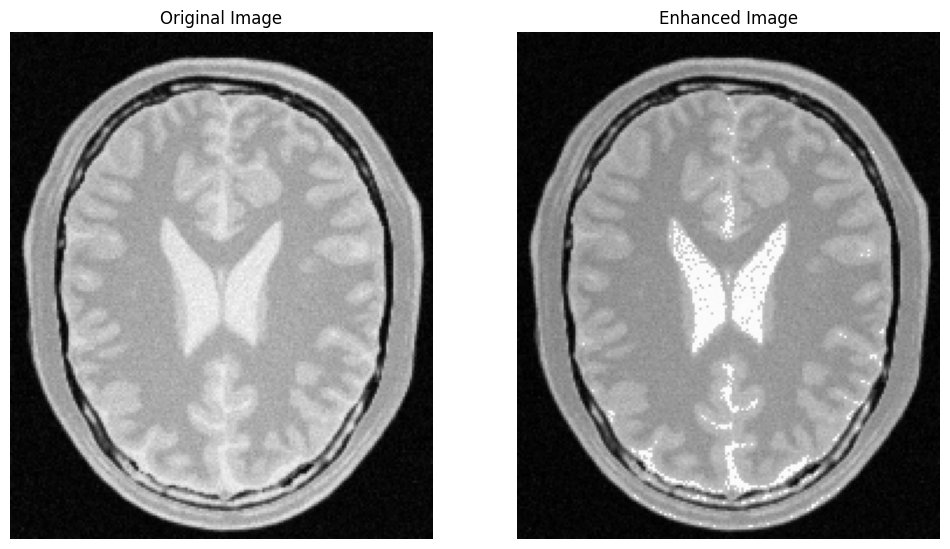

In [25]:
# Display
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(image_brain, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(wm_img, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Enhanced Image')
ax[1].axis('off')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Kasun\AppData\Local\Temp\ipykernel_26936\2031813857.py:4: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')


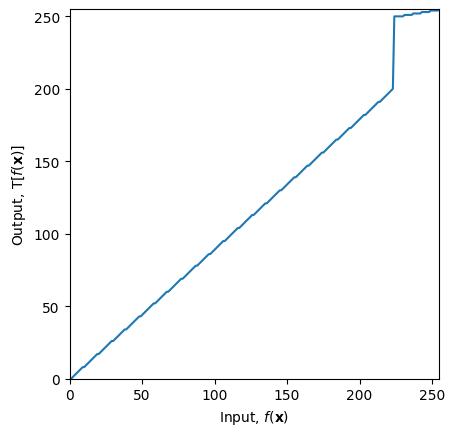

In [26]:
fig, ax = plt.subplots()
ax.plot(wm_transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()

In [50]:
t3 = np.linspace(0, 110, 111).astype('uint8')          
t4 = np.linspace(110, 125, 50).astype('uint8')
t5 = np.linspace(160, 255, 95).astype('uint8')    
gm_transform = np.concatenate((t3, t4, t5), axis=0)

gm_img = cv.LUT(image_brain, gm_transform)

In [48]:
gm_transform.shape

(256,)

Accentuate gray matter

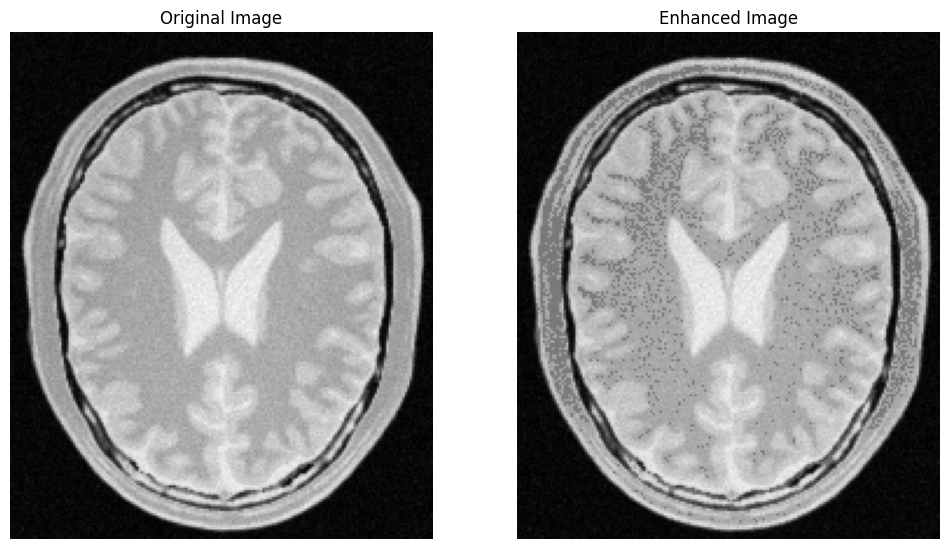

In [51]:
# Display
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(image_brain, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(gm_img, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Enhanced Image')
ax[1].axis('off')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Kasun\AppData\Local\Temp\ipykernel_26936\770876122.py:4: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')


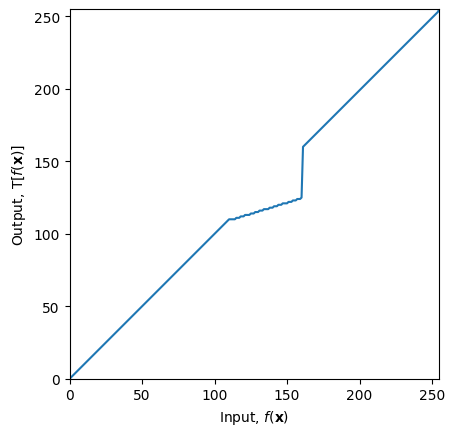

In [52]:
fig, ax = plt.subplots()
ax.plot(gm_transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()

Gamma correction

In [9]:
image_gamma = cv.imread('a1images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)

In [10]:
image_gamma_rgb = cv.cvtColor(image_gamma, cv.COLOR_BGR2RGB)

Convert to LAB color space

In [11]:
lab_img = cv.cvtColor(image_gamma, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab_img)

In [24]:
gamma = 0.5
table = np.array([(i / 255.0) ** gamma * 255.0 for i in np.arange(0, 256)]).astype("uint8")

In [25]:
L_gamma  = cv.LUT(L, table)

In [26]:
lab_img = cv.merge([L_gamma, a, b])

In [27]:
image_gamma_corrected = cv.cvtColor(lab_img, cv.COLOR_LAB2BGR)

In [28]:
image_gamma_corrected_rgb = cv.cvtColor(image_gamma_corrected, cv.COLOR_BGR2RGB)

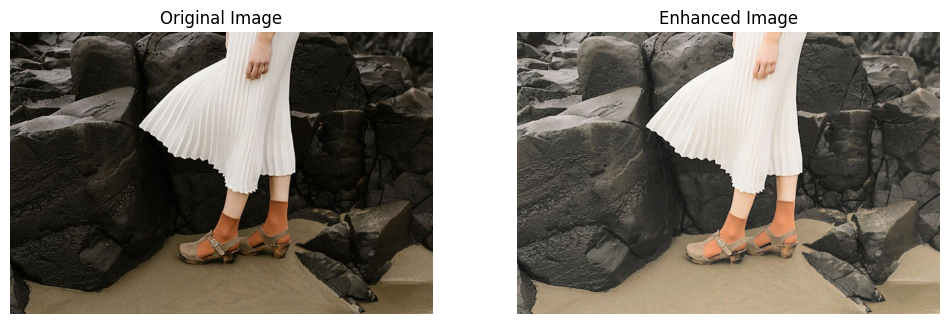

In [29]:
# Display
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(image_gamma_rgb, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(image_gamma_corrected_rgb, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Enhanced Image')
ax[1].axis('off')
plt.show()

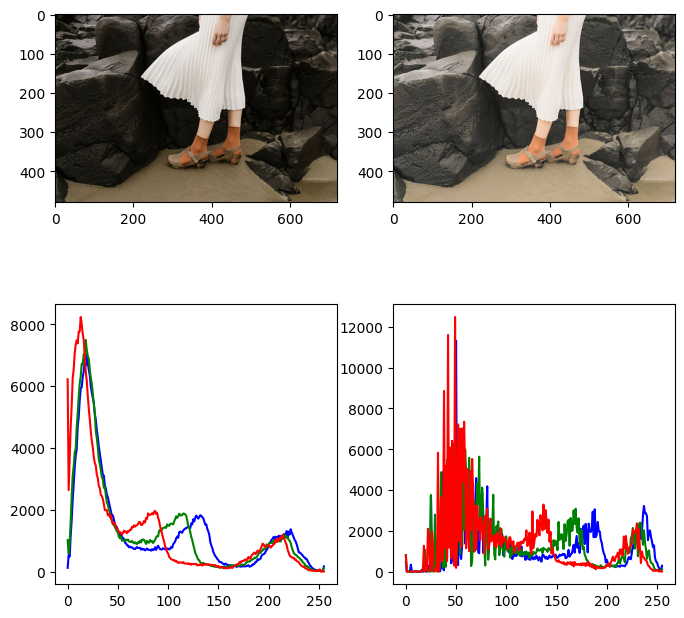

In [34]:
f, axarr = plt.subplots(2,2, figsize=(8,8))
axarr[0,0].imshow(image_gamma_rgb)
axarr[0,1].imshow(image_gamma_corrected_rgb)

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([image_gamma_rgb], [i], None, [256], [0,256])
    axarr[1,0].plot(hist_orig, color = c)
    hist_gamma = cv.calcHist([image_gamma_corrected_rgb], [i], None, [256], [0,256])
    axarr[1,1].plot(hist_gamma, color = c)    

#### Increasing the vibrance of a photograph

In [36]:
image_spider = cv.imread("a1images/spider.png", cv.IMREAD_COLOR)
assert image_spider is not None

In [37]:
hsv_image = cv.cvtColor(image_spider, cv.COLOR_BGR2HSV)

In [38]:
h, s, v = cv.split(hsv_image)

In [83]:
a = 0.7
sigma = 70.0

x = np.arange(256)

gaussian_term = a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2))

transformed_values = x + gaussian_term


transform = np.clip(transformed_values, 0, 255).astype(np.uint8)

In [84]:
s_trasnformed = cv.LUT(s, transform)

In [85]:
new_spider_hsv = cv.merge([h, s_trasnformed, v])
new_spider = cv.cvtColor(new_spider_hsv, cv.COLOR_HSV2BGR)

In [86]:
cv.imshow('Image', new_spider)
cv.waitKey(0)
cv.destroyAllWindows()

Recombine

In [64]:
new_spider_hsv = cv.merge([h, s_trasnformed, v])

In [87]:
image_spider_rgb = cv.cvtColor(image_spider, cv.COLOR_BGR2RGB)
new_spider_rgb = cv.cvtColor(new_spider, cv.COLOR_BGR2RGB)


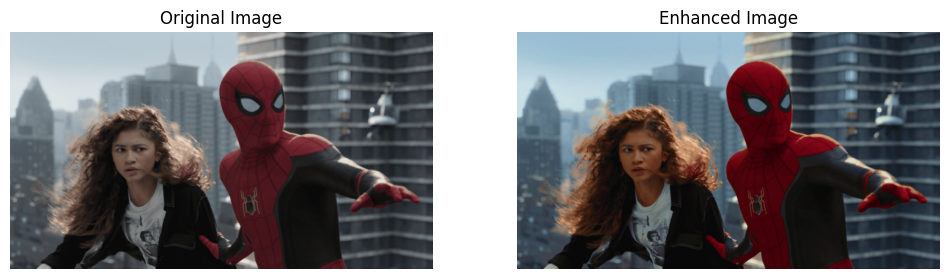

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(image_spider_rgb, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(new_spider_rgb, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Enhanced Image')
ax[1].axis('off')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Kasun\AppData\Local\Temp\ipykernel_26088\2987247321.py:4: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')


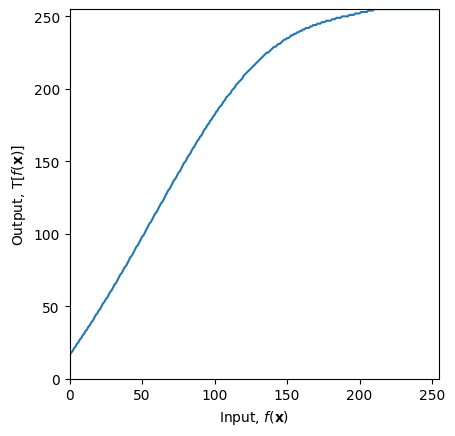

In [89]:
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()

histogram equalization only to the foreground of an image

In [3]:
image_jen = cv.imread("a1images/jeniffer.jpg", cv.IMREAD_COLOR)
assert image_jen is not None

In [8]:
hsv_jen = cv.cvtColor(image_jen, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv_jen)

(np.float64(-0.5), np.float64(3839.5), np.float64(2159.5), np.float64(-0.5))

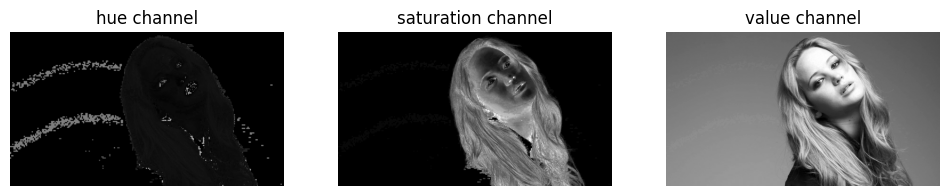

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))
ax[0].imshow(h, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('hue channel')
ax[0].axis('off')
ax[1].imshow(s, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('saturation channel')
ax[1].axis('off')
ax[2].imshow(v, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('value channel')
ax[2].axis('off')

In [21]:
thresh_val = 15
ret, mask = cv.threshold(s, thresh_val, 255, cv.THRESH_BINARY)

In [45]:
foreground_bgr = cv.bitwise_and(image_jen, image_jen, mask=mask)

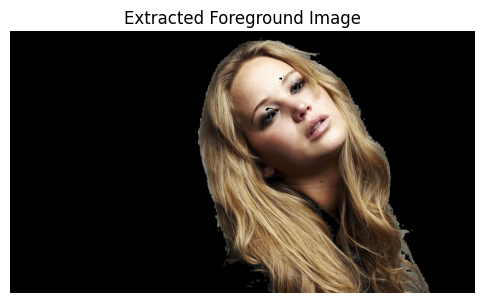

In [46]:
plt.figure(figsize=(6, 6))
plt.imshow(cv.cvtColor(foreground_bgr, cv.COLOR_BGR2RGB))
plt.title('Extracted Foreground Image')
plt.axis('off')
plt.show()

In [51]:
foreground_gray = cv.cvtColor(foreground_bgr, cv.COLOR_BGR2GRAY)
M, N = foreground_gray.shape          # rows (height), cols (width)
L = 256

In [52]:
hist,bins = np.histogram(foreground_gray.ravel(),256,[0,256])
cdf = hist.cumsum()

In [53]:
t = np.array([(L-1)/(M*N)*cdf[k] for k in range(256)], dtype=np.uint8)
g = t[foreground_gray]

In [54]:
background = cv.bitwise_and(image_jen, image_jen, mask=cv.bitwise_not(mask))

In [55]:
final = cv.add(cv.cvtColor(background, cv.COLOR_BGR2GRAY), g)

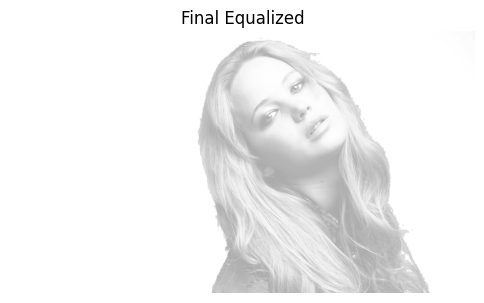

In [56]:
plt.figure(figsize=(6, 6))
plt.imshow(final, cmap='gray', vmin=0, vmax=255)
plt.title('Final Equalized')
plt.axis('off')
plt.show()

Filtering with the Sobel operator

In [58]:
image_einstein = cv.imread("a1images/einstein.png", cv.IMREAD_GRAYSCALE)
assert image_einstein is not None

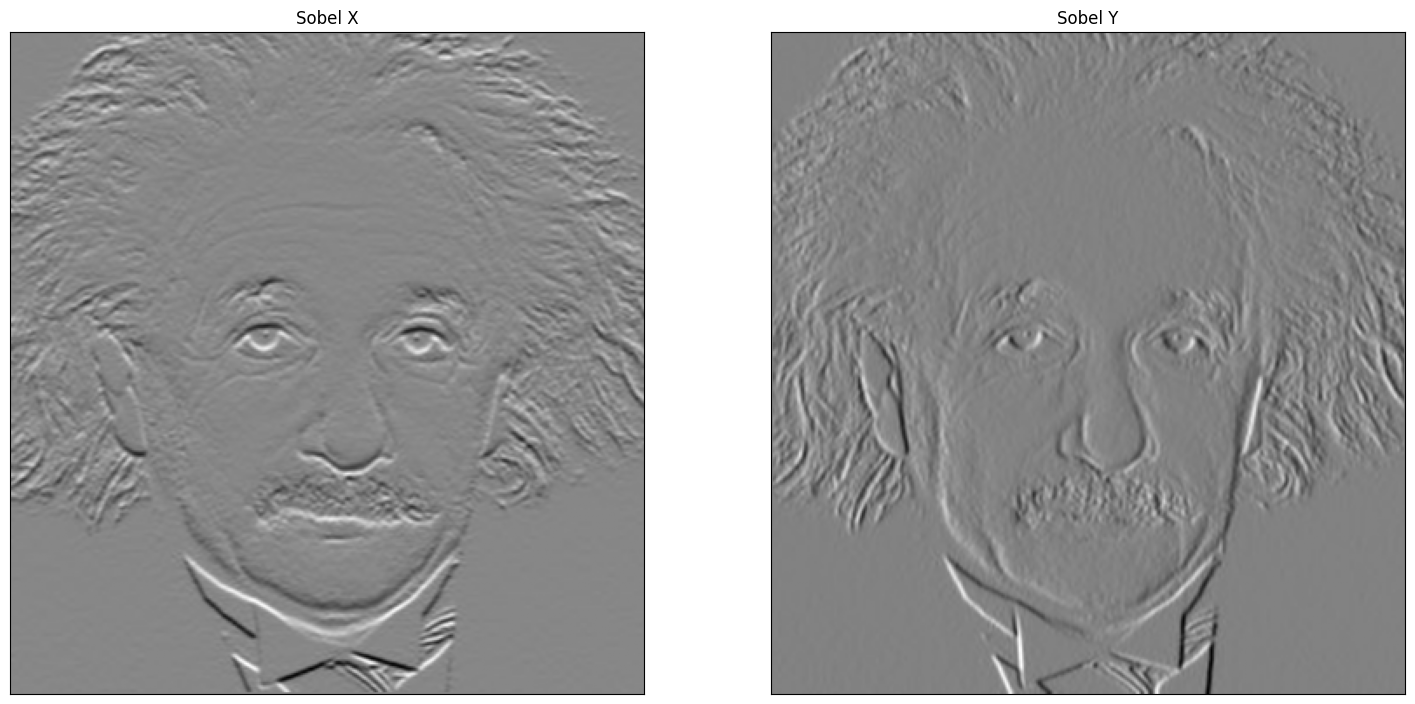

In [59]:
sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

im_x = cv.filter2D(image_einstein, cv.CV_64F, sobel_x)
im_y = cv.filter2D(image_einstein, cv.CV_64F, sobel_y)

fig, ax  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(im_x, cmap='gray')
ax[0].set_title('Sobel X')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

In [ ]:
def conv2d(image, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh//2, kw//2 # if 3x3, pad 1 and so on
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    out = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+kh, j:j+kw]
            out[i, j] = np.sum(region * kernel)
    return out

grad_x_manual = conv2d(image_einstein, sobel_x)
grad_y_manual = conv2d(image_einstein, sobel_y)


In [ ]:
sobel_1 = np.array([[1], [2], [1]], dtype=np.float32)  
sobel_2 = np.array([[1, 0, -1]], dtype=np.float32)

temp_x = conv2d(image_einstein, sobel_2)
grad_x_sep = conv2d(temp_x, sobel_1)

temp_y = conv2d(image_einstein, sobel_1.T) 
grad_y_sep = conv2d(temp_y, sobel_2.T) 


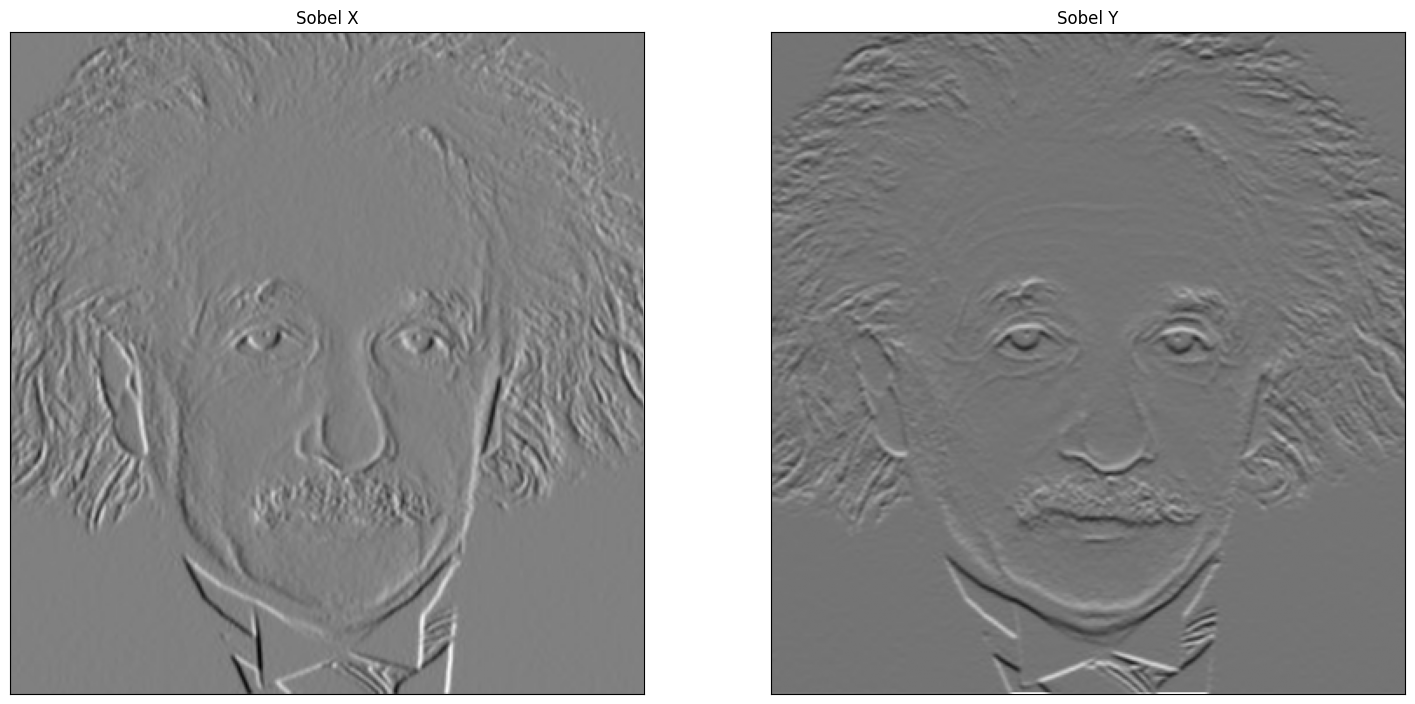

In [62]:
fig, ax  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(grad_x_sep, cmap='gray')
ax[0].set_title('Sobel X')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(grad_y_sep, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()